# IM939 Lab 2 - Part 2

It is far easier to look at trends in data by creating plots. Below we do just that and briefly look at plotting data by date.

In [1]:
import pandas as pd
df = pd.read_csv('office_ratings.csv', encoding='UTF-8')

In [2]:
df.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


## Plots

## Univariate - a single variable

Plots are a great way to see trends.

In [3]:
?df.plot

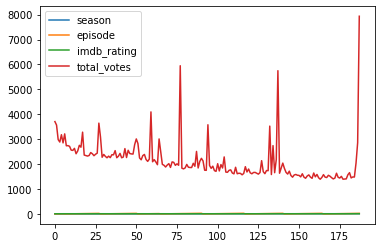

In [4]:
df.plot()

We can look at points instead of lines.

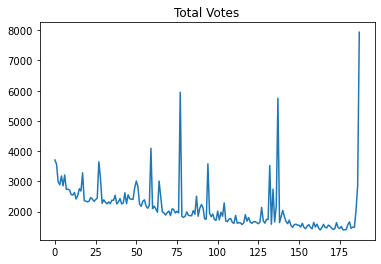

In [4]:
df['total_votes'].plot(title='Total Votes')

In [5]:
?df.plot

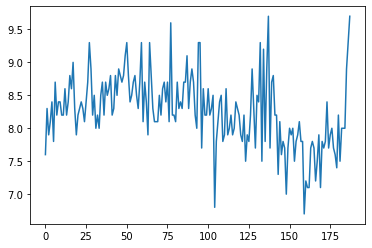

In [9]:
df['imdb_rating'].plot()

Or we could create subplots.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000146E7DE1850>,
      dtype=object)

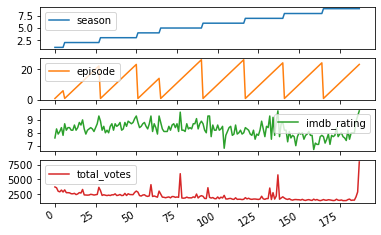

In [10]:
df.plot(subplots=True)

Season and episode is not at all informative here.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000146E7F39100>,
      dtype=object)

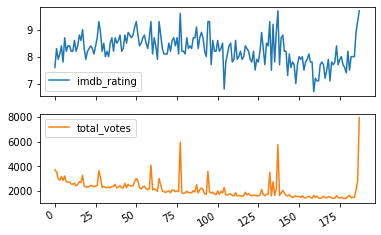

In [11]:
df[['imdb_rating', 'total_votes']].plot(subplots=True)

In [6]:
?df.plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000146E8F815B0>,
      dtype=object)

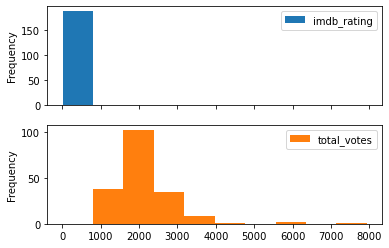

In [12]:
df[['imdb_rating', 'total_votes']].plot(subplots=True, kind='hist')

Unfortunatly, our x axis is bunched up. The above tells us that the all our IMDB ratings are between 0 and a little less than 1000... not useful.

Probably best to plot them individually.

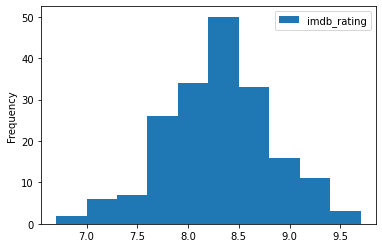

In [16]:
df[['imdb_rating']].plot(kind='hist')

Quite a sensible guassian shape (a central point with the frequency decreasing symmetrically).

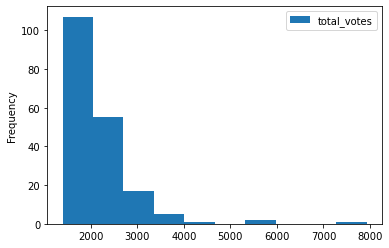

In [17]:
df[['total_votes']].plot(kind='hist')

A positively skewed distribution - many smaller values and very few high values.

## Bivariate

The number of votes and the imdb rating are not independent events. These two data variables are related.

Scatter plots are simple ways to explore the relationship between two data variables. Note, I use the term data variables instead or just variables to avoid any confusion.

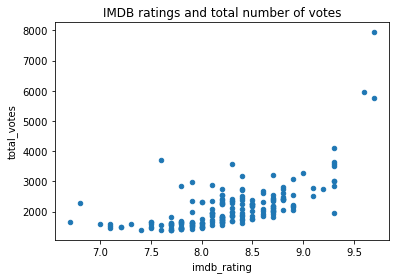

In [19]:
df.plot(x='imdb_rating', y='total_votes', kind='scatter', title='IMDB ratings and total number of votes')

That is really interesting. The episodes with the highest rating also have the greatest number of votes. There was a cleary a great outpouring of happiness there.

Which episodes were they?

In [20]:
df[df['total_votes'] > 5000]

,season,episode,title,imdb_rating,total_votes,air_date
77,5,13,Stress Relief,9.6,5948,2009-02-01
137,7,21,"Goodbye, Michael",9.7,5749,2011-04-28
187,9,23,Finale,9.7,7934,2013-05-16


Excellent. Any influence of season on votes?

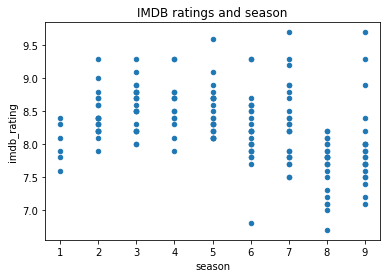

In [21]:
df.plot(x='season', y='imdb_rating', kind='scatter', title='IMDB ratings and season')

Season 8 seems to be a bit low. But nothing too extreme.

## Dates

Our data contains air date information. Currently, that column is 'object' or a string.

In [7]:
df.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


In [22]:
df.dtypes

season           int64
episode          int64
title           object
imdb_rating    float64
total_votes      int64
air_date        object
dtype: object

We can set this to be datetime instead. That will help us plot the time series of the data.

In [8]:
df['air_date'] =  pd.to_datetime(df['air_date'])
df.dtypes

season                  int64
episode                 int64
title                  object
imdb_rating           float64
total_votes             int64
air_date       datetime64[ns]
dtype: object

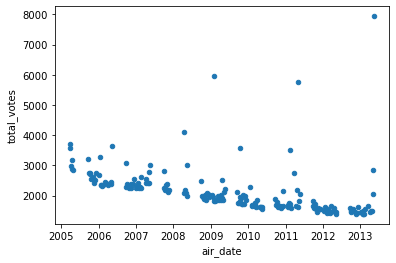

In [9]:
df.plot(x = 'air_date', y = 'total_votes', kind='scatter')

We can look at multiple variables using subplots.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2DE3E9FD0>,
      dtype=object)

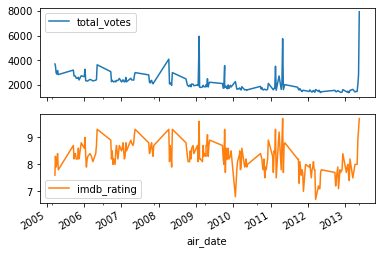

In [11]:
df[['air_date', 'total_votes', 'imdb_rating']].plot(x = 'air_date', subplots=True)

## Multivariate

Our dataset is quite simple. But we can look at two variables (total_votes, imdb_rating) by a third (season).

season
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

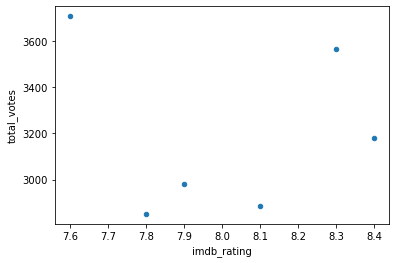

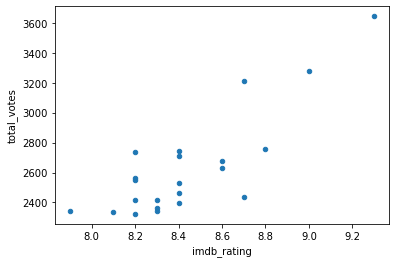

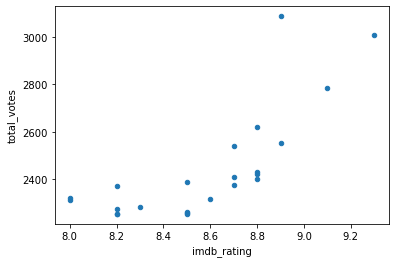

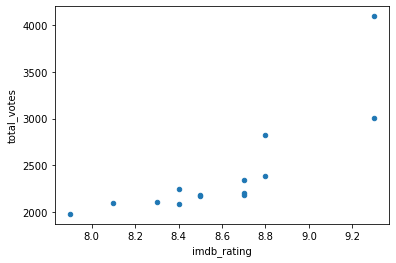

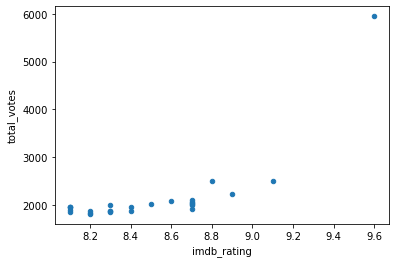

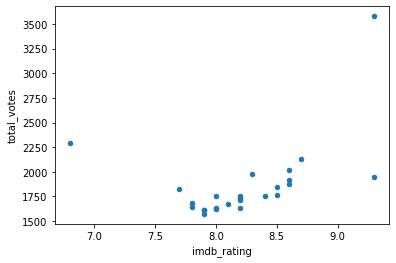

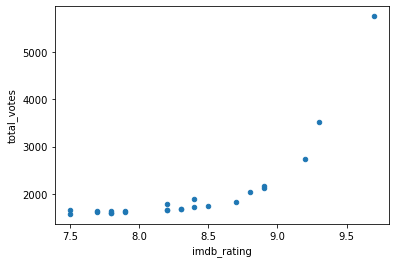

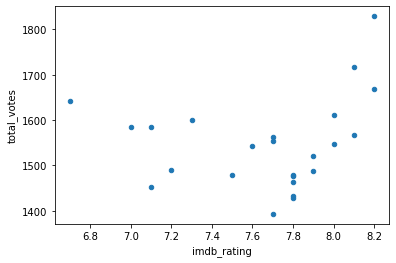

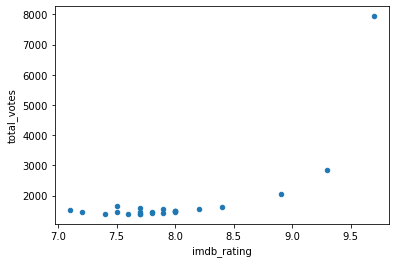

In [14]:
df.groupby('season').plot(kind='scatter', y = 'total_votes', x = 'imdb_rating')

There is a lot more you can do with plots with Pandas and Matplotlib. A good resource is the [visualisation section of the pandas documentation](https://pandas.pydata.org/docs/user_guide/visualization.html#basic-plotting-plot).